In [10]:
import pandas as pd
import datetime as dt

In [25]:
ques_dams = pd.read_csv('./datas/questionaire_data/ques_evening/ques_evening_dams.csv')
ques_bodyfatigue = pd.read_csv('./datas/questionaire_data/ques_evening/ques_evening_bodyfatigue.csv')
ques_eval = pd.read_csv('./datas/questionaire_data/ques_evening/ques_evening_eval.csv')
ques_workenga = pd.read_csv('./datas/questionaire_data/ques_evening/ques_evening_workenga.csv')

# 自覚症調べ

In [15]:
# ques_dams
ques_bodyfatigue.index = pd.DatetimeIndex(ques_bodyfatigue.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_bodyfatigue['datetime_jp'] = ques_bodyfatigue.index
ques_bodyfatigue['Date_jp'] = pd.to_datetime(ques_bodyfatigue['datetime_jp']).dt.date
ques_bodyfatigue=ques_bodyfatigue[(ques_bodyfatigue['Date_jp']>=dt.date(2021,1,12))]
ques_bodyfatigue['hour'] = pd.to_datetime(ques_bodyfatigue['datetime_jp']).dt.hour

<AxesSubplot:>

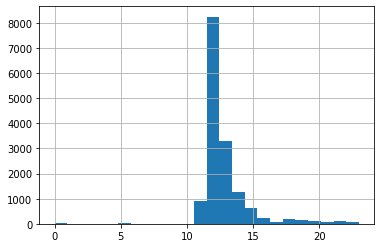

In [16]:
ques_bodyfatigue['hour'].hist(bins=24)

In [17]:
ques_bodyfatigue['name'].unique()
ques_bodyfatigue = ques_bodyfatigue.reset_index(drop=True)
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がおもい', 'atama_omoi'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='気分がわるい', 'kibun_warui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がいたい', 'atama_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='肩がこる', 'kata_koru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='あくびがでる', 'akubi_deru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='手や指がいたい', 'teyayubi_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='めまいがする', 'memai_suru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='ねむい', 'nemui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='やる気がとぼしい', 'yaruki_tobosii'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='腕がだるい', 'ude_darui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='横になりたい', 'yoko_naritai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='腰がいたい', 'kosi_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='足がだるい', 'asi_darui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がぼんやりする', 'atama_bonyari'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='全身がだるい', 'zensin_darui'] =ques_bodyfatigue['value_bodyfatigue']

In [18]:
ques_bodyfatigue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype                     
---  ------             --------------  -----                     
 0   Unnamed: 0         15402 non-null  int64                     
 1   datetime           15402 non-null  object                    
 2   user_id            15402 non-null  int64                     
 3   activity           15402 non-null  object                    
 4   record_type_id     15402 non-null  float64                   
 5   name               15402 non-null  object                    
 6   value              15402 non-null  object                    
 7   value_int          8651 non-null   float64                   
 8   value_bodyfatigue  15402 non-null  float64                   
 9   datetime_jp        15402 non-null  datetime64[ns, Asia/Tokyo]
 10  Date_jp            15402 non-null  object                    
 11  hour           

In [19]:
ques_bodyfatigue_sum = ques_bodyfatigue.groupby(['datetime','user_id']).sum()
ques_bodyfatigue_sum = ques_bodyfatigue_sum[['record_type_id', 'hour',
       'atama_omoi', 'kibun_warui', 'atama_itai', 'kata_koru', 'akubi_deru',
       'teyayubi_itai', 'memai_suru', 'nemui', 'yaruki_tobosii', 'ude_darui',
       'yoko_naritai', 'kosi_itai', 'asi_darui', 'atama_bonyari',
       'zensin_darui']]
ques_bodyfatigue_sum = ques_bodyfatigue_sum.reset_index()

ques_bodyfatigue_sum['value_nemuke'] = (ques_bodyfatigue_sum['nemui']+ques_bodyfatigue_sum['yoko_naritai']+ques_bodyfatigue_sum['akubi_deru']+ques_bodyfatigue_sum['yaruki_tobosii']+ques_bodyfatigue_sum['zensin_darui'])/5
ques_bodyfatigue_sum['value_hukai'] = (ques_bodyfatigue_sum['atama_itai']+ques_bodyfatigue_sum['atama_omoi']+ques_bodyfatigue_sum['kibun_warui']+ques_bodyfatigue_sum['atama_bonyari']+ques_bodyfatigue_sum['memai_suru'])/5
ques_bodyfatigue_sum['value_boyake'] =  (ques_bodyfatigue_sum['ude_darui']+ques_bodyfatigue_sum['kosi_itai']+ques_bodyfatigue_sum['teyayubi_itai']+ques_bodyfatigue_sum['asi_darui']+ques_bodyfatigue_sum['kata_koru'])/5

ques_bodyfatigue_sum['datetime_jp_before3'] = pd.to_datetime(ques_bodyfatigue_sum['datetime'])-dt.timedelta(hours=3)
ques_bodyfatigue_sum['datetime_jp_before6'] = pd.to_datetime(ques_bodyfatigue_sum['datetime'])-dt.timedelta(hours=6)
ques_bodyfatigue_sum['datetime_jp_before9'] = pd.to_datetime(ques_bodyfatigue_sum['datetime'])-dt.timedelta(hours=9)

ques_bodyfatigue_sum = ques_bodyfatigue_sum[['datetime', 'user_id', 'datetime_jp_before3',
       'datetime_jp_before6', 'datetime_jp_before9','record_type_id', 'hour', 'atama_omoi',
       'kibun_warui', 'atama_itai', 'kata_koru', 'akubi_deru', 'teyayubi_itai',
       'memai_suru', 'nemui', 'yaruki_tobosii', 'ude_darui', 'yoko_naritai',
       'kosi_itai', 'asi_darui', 'atama_bonyari', 'zensin_darui',
       'value_nemuke', 'value_hukai', 'value_boyake']]

In [21]:
# ques_bodyfatigue_sum.to_csv('./datas/preprocessed_questionaire/ques_evening_body_fatigue.csv')

# dams

In [33]:
ques_dams.index = pd.DatetimeIndex(ques_dams.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_dams['datetime_jp'] = ques_dams.index
ques_dams['Date_jp'] = pd.to_datetime(ques_dams['datetime_jp']).dt.date
ques_dams=ques_dams[(ques_dams['Date_jp']>=dt.date(2021,1,12))]
ques_dams['hour'] = pd.to_datetime(ques_dams['datetime_jp']).dt.hour

<ipython-input-33-cea18b18873b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_dams['hour'] = pd.to_datetime(ques_dams['datetime_jp']).dt.hour


In [38]:
ques_dams['name'].unique()
ques_dams = ques_dams.reset_index(drop=True)
ques_dams.loc[ques_dams['name']=='はつらつとした', 'haturatu'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='暗い', 'kurai'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='気がかりな', 'kigakarina'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='嬉しい', 'uresii'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='嫌な', 'iyana'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='不安な', 'fuanna'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='楽しい', 'tanosii'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='沈んだ', 'sizunda'] =ques_dams['value_dams']
ques_dams.loc[ques_dams['name']=='心配な', 'sinpaina'] =ques_dams['value_dams']

In [40]:
ques_dams.columns

Index(['Unnamed: 0', 'datetime', 'user_id', 'activity', 'record_type_id',
       'name', 'value', 'value_dams', 'datetime_jp', 'Date_jp', 'hour',
       'haturatu', 'kurai', 'kigakarina', 'uresii', 'iyana', 'fuanna',
       'tanosii', 'sizunda', 'sinpaina'],
      dtype='object')

In [46]:
ques_dams_sum = ques_dams.groupby(['datetime_jp','user_id']).sum()

ques_dams_sum = ques_dams_sum[['value_dams', 'hour', 'haturatu',
       'kurai', 'kigakarina', 'uresii', 'iyana', 'fuanna', 'tanosii',
       'sizunda', 'sinpaina']]
ques_dams_sum = ques_dams_sum.reset_index()

ques_dams_sum['positive_score'] = (ques_dams_sum['haturatu']+ques_dams_sum['uresii']+ques_dams_sum['tanosii'])/3
ques_dams_sum['anxious_score'] = (ques_dams_sum['kigakarina']+ques_dams_sum['fuanna']+ques_dams_sum['sinpaina'])/3
ques_dams_sum['depressive_score'] =  (ques_dams_sum['kurai']+ques_dams_sum['iyana']+ques_dams_sum['sizunda'])/3

In [49]:
ques_dams_sum.columns

Index(['datetime_jp', 'user_id', 'value_dams', 'hour', 'haturatu', 'kurai',
       'kigakarina', 'uresii', 'iyana', 'fuanna', 'tanosii', 'sizunda',
       'sinpaina', 'positive_score', 'anxious_score', 'depressive_score',
       'datetime_jp_before3', 'datetime_jp_before6', 'datetime_jp_before9'],
      dtype='object')

In [48]:
ques_dams_sum['datetime_jp_before3'] = pd.to_datetime(ques_dams_sum['datetime_jp'])-dt.timedelta(hours=3)
ques_dams_sum['datetime_jp_before6'] = pd.to_datetime(ques_dams_sum['datetime_jp'])-dt.timedelta(hours=6)
ques_dams_sum['datetime_jp_before9'] = pd.to_datetime(ques_dams_sum['datetime_jp'])-dt.timedelta(hours=9)

In [51]:
# ques_dams_sum.to_csv('./datas/preprocessed_questionaire/ques_evening_dams.csv')

# ワークエンゲージメント

In [58]:
ques_workenga.index = pd.DatetimeIndex(ques_workenga.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_workenga['datetime_jp'] = ques_workenga.index
ques_workenga['Date_jp'] = pd.to_datetime(ques_workenga['datetime_jp']).dt.date
ques_workenga=ques_workenga[(ques_workenga['Date_jp']>=dt.date(2021,1,12))]
ques_workenga['hour'] = pd.to_datetime(ques_workenga['datetime_jp']).dt.hour

ques_workenga['name'].unique()
ques_workenga = ques_workenga.reset_index(drop=True)
ques_workenga.loc[ques_workenga['name']=='今、仕事をしていると、活力がみなぎるように感じる', 'katuryoku'] =ques_workenga['value_workenga']
ques_workenga.loc[ques_workenga['name']=='今、仕事に熱心である', 'nessin'] =ques_workenga['value_workenga']
ques_workenga.loc[ques_workenga['name']=='今、私は仕事にのめり込んでいる', 'nomerikomu'] =ques_workenga['value_workenga']

ques_workenga_sum = ques_workenga.groupby(['datetime_jp','user_id']).sum()

# ques_workenga_sum = ques_workenga_sum[['value_dams', 'hour', 'haturatu',
#        'kurai', 'kigakarina', 'uresii', 'iyana', 'fuanna', 'tanosii',
#        'sizunda', 'sinpaina']]
ques_workenga_sum = ques_workenga_sum.reset_index()

ques_workenga_sum['workenga_score'] = (ques_workenga_sum['katuryoku']+ques_workenga_sum['nessin']+ques_workenga_sum['nomerikomu'])/3

ques_workenga_sum['datetime_jp_before3'] = pd.to_datetime(ques_workenga_sum['datetime_jp'])-dt.timedelta(hours=3)
ques_workenga_sum['datetime_jp_before6'] = pd.to_datetime(ques_workenga_sum['datetime_jp'])-dt.timedelta(hours=6)
ques_workenga_sum['datetime_jp_before9'] = pd.to_datetime(ques_workenga_sum['datetime_jp'])-dt.timedelta(hours=9)

<ipython-input-58-86a66cebf3bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_workenga['hour'] = pd.to_datetime(ques_workenga['datetime_jp']).dt.hour


In [61]:
# ques_workenga_sum.to_csv('./datas/preprocessed_questionaire/ques_evening_workenga.csv')

# 自己評価

In [66]:
ques_eval.index = pd.DatetimeIndex(ques_eval.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_eval['datetime_jp'] = ques_eval.index
ques_eval['Date_jp'] = pd.to_datetime(ques_eval['datetime_jp']).dt.date
ques_eval=ques_eval[(ques_eval['Date_jp']>=dt.date(2021,1,12))]
ques_eval['hour'] = pd.to_datetime(ques_eval['datetime_jp']).dt.hour

ques_eval['name'].unique()
ques_eval = ques_eval.reset_index(drop=True)
ques_eval.loc[ques_eval['name']=='業務に集中できていた', 'syutyu'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='効率的に業務ができた', 'kouritu'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='予定通りに業務ができた', 'yoteidori'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='関係者と十分にコミュニケーションがとれた', 'jubun_comu'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='関係者と効率的にコミュニケーションがとれた', 'kouritu_comu'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='新たなアイデアが出た', 'idea'] =ques_eval['value_eval']
ques_eval.loc[ques_eval['name']=='成果に結びついた', 'seika'] =ques_eval['value_eval']

ques_eval_sum = ques_eval.groupby(['datetime_jp','user_id']).sum()

# ques_eval_sum = ques_eval_sum[['value_dams', 'hour', 'haturatu',
#        'kurai', 'kigakarina', 'uresii', 'iyana', 'fuanna', 'tanosii',
#        'sizunda', 'sinpaina']]
ques_eval_sum = ques_eval_sum.reset_index()

# ques_eval_sum['positive_score'] = (ques_eval_sum['haturatu']+ques_eval_sum['uresii']+ques_eval_sum['tanosii'])/3
# ques_eval_sum['anxious_score'] = (ques_eval_sum['kigakarina']+ques_eval_sum['fuanna']+ques_eval_sum['sinpaina'])/3
# ques_eval_sum['depressive_score'] =  (ques_eval_sum['kurai']+ques_eval_sum['iyana']+ques_eval_sum['sizunda'])/3

ques_eval_sum['datetime_jp_before3'] = pd.to_datetime(ques_eval_sum['datetime_jp'])-dt.timedelta(hours=3)
ques_eval_sum['datetime_jp_before6'] = pd.to_datetime(ques_eval_sum['datetime_jp'])-dt.timedelta(hours=6)
ques_eval_sum['datetime_jp_before9'] = pd.to_datetime(ques_eval_sum['datetime_jp'])-dt.timedelta(hours=9)

<ipython-input-66-35f41c7f2806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_eval['hour'] = pd.to_datetime(ques_eval['datetime_jp']).dt.hour


In [69]:
# ques_eval_sum.to_csv('./datas/preprocessed_questionaire/ques_evening_eval.csv')